In [3]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 69.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=5bc5ddda5a9af48baa8ef9934936a0793628ba74f9102c825b339f7e3bcaa17a
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

Importing the libraries

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text


Loading Data

In [6]:
df =  pd.read_csv('/content/drive/MyDrive/CDAC_DAI/NLP/SMSSpamCollection (1)', sep='\t', names=['label', 'text'])

In [7]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)

Data Preparation

In [9]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(data_train,
                                                                   text_column='text',
                                                                   label_columns='label',
                                                                   val_df=data_test,
                                                                   preprocess_mode='bert')

['ham', 'spam']
      ham  spam
1978  0.0   1.0
3989  1.0   0.0
3935  1.0   0.0
4078  1.0   0.0
4086  0.0   1.0
['ham', 'spam']
      ham  spam
3245  1.0   0.0
944   1.0   0.0
1044  1.0   0.0
2484  1.0   0.0
812   1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [10]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Building the classifer

In [11]:
##use distilbert if  you want
model = text.text_classifier(name='bert',
                              train_data=(x_train, y_train),
                              preproc=preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [12]:
type(model)

keras.src.engine.functional.Functional

In [13]:
#here we have taken batch size as 6 as from the document it is recomented to use this with maxlen as 500
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

In [14]:
learner

# Train the model


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 471s 601ms/step - loss: 0.4294 - accuracy: 0.7536
Epoch 2/2
743/743 [==============================] - 195s 262ms/step - loss: 3.0703 - accuracy: 0.8046


done.
Visually inspect loss plot and select learning rate associated with falling loss


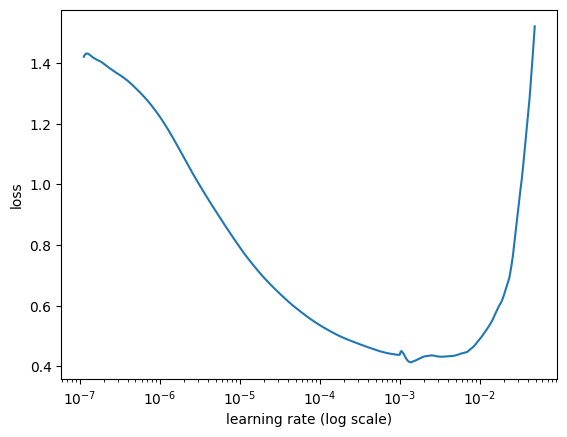

In [15]:
# train the model
learner.lr_find(show_plot  = True, max_epochs=2)

In [16]:
learner.fit_onecycle(lr=10e-3, epochs=1)
predictor  =  ktrain.get_predictor(learner.model, preproc)
predictor.save('/content/drive/MyDrive/CDAC_DAI/NLP/model/model_bert')




begin training using onecycle policy with max lr of 0.01...
743/743 [==============================] - 517s 665ms/step - loss: 0.6362 - accuracy: 0.8275 - val_loss: 0.3967 - val_accuracy: 0.8664


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
msg1 = ['Freemsg:1-month unlimited free call! Activate the Smart Card now!']
predictor.predict(msg1)

['ham']